In [60]:
pip install pandas scikit-learn matplotlib



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [62]:
# Load dataset
df = pd.read_csv('amazon_eco-friendly_products.csv')  # Adjust path if necessary
df = df.dropna(subset=['title'])  # Ensure 'title' column exists
df['title'] = df['title'].str.lower()

In [63]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['title'])

In [64]:
# Function to determine if a product is biodegradable
def is_biodegradable(title):
    keywords = ['biodegradable', 'bamboo', 'compostable', 'eco', 'organic', 'natural', 'wooden', 'plant-based']
    title = title.lower()
    return int(any(keyword in title for keyword in keywords))


In [65]:
# Apply labeling
df['label'] = df['title'].apply(is_biodegradable)

In [66]:
# Train-test split
X = tfidf_matrix
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:

# Evaluate classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       219
           1       0.96      0.99      0.98       499

    accuracy                           0.97       718
   macro avg       0.97      0.95      0.96       718
weighted avg       0.97      0.97      0.96       718



In [69]:
# Function to predict label
def predict_label(text):
    vector = vectorizer.transform([text])
    prediction = clf.predict(vector)
    return "Biodegradable" if prediction[0] == 1 else "Not Biodegradable"


In [83]:
import matplotlib.pyplot as plt
import os

def plot_eco_alternatives(product_keyword):
    # Compute the keyword vector
    keyword_vector = vectorizer.transform([product_keyword.lower()])
    
    # Calculate cosine similarities
    cosine_similarities = cosine_similarity(keyword_vector, tfidf_matrix).flatten()
    
    # Get indices of top 5 similar products
    top_indices = cosine_similarities.argsort()[-5:][::-1]
    
    # Retrieve top scores and titles
    top_scores = cosine_similarities[top_indices]
    top_titles = df.iloc[top_indices]['title']
    
    # Shorten titles to a maximum of 30 characters
    shortened_titles = [title[:70] + '...' if len(title) > 30 else title for title in top_titles]


    print(f"Top 5 Eco-Friendly Alternatives for '{product_keyword}':\n")
    for i, (title, score) in enumerate(zip(shortened_titles, top_scores), start=1):
        print(f"{i}. {title} (Similarity Score: {score:.2f})")
    
    # Shorten titles to a maximum of 30 characters
    shortened_titles = [title[:30] + '...' if len(title) > 30 else title for title in top_titles]

    
    # Create a figure with specified size and DPI
    fig = plt.figure(figsize=(5, 3), dpi=150)  # Adjust size as needed
    plt.barh(shortened_titles[::-1], top_scores[::-1], color='green')
    plt.xlabel('Similarity Score')
    plt.title(f'Top 5 Eco-Friendly Alternatives for "{product_keyword}"')
    plt.tight_layout()

    
    # Show the plot
 
    plt.show()
    


Top 5 Eco-Friendly Alternatives for 'storage box':

1. great birthday gifts handmade decorative wooden jewelry box tree of li... (Similarity Score: 0.49)
2. (2-pack) unfinished wooden box with hinged lid for crafts diy storage ... (Similarity Score: 0.46)
3. bamboo storage box with multi-purpose tray - large premium handmade wo... (Similarity Score: 0.45)
4. stainless steel lunch box, leak proof 3 compartment, medium | redesign... (Similarity Score: 0.40)
5. (2-pack unfinished unpainted wooden box with hinged lid for crafts diy... (Similarity Score: 0.39)


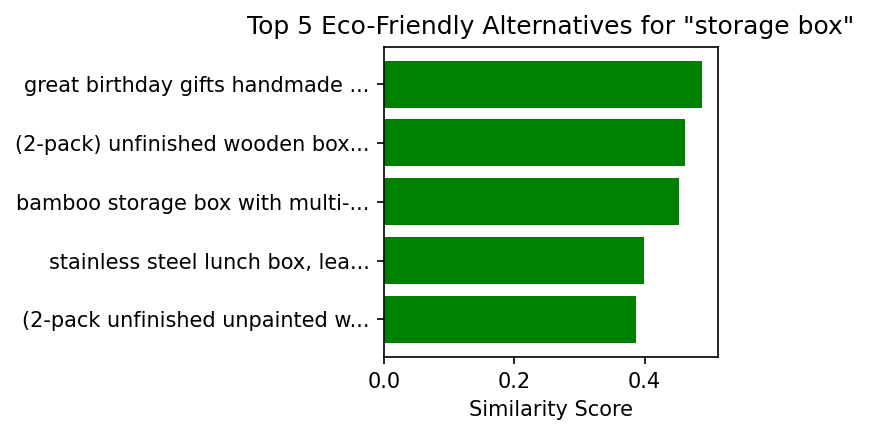

In [93]:

plot_eco_alternatives("storage box")
